In [ ]:
%load_ext autoreload
%autoreload 2

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
import json
from random import sample

import matplotlib.pyplot as plt
import seaborn as sns


import torch
import torch.nn.functional as F

from transformers import *



In [109]:
file_synonyms_intensity = open('synonyms_intensity.txt')
file_synonyms_exact = open('synonyms_exact.txt')

synonyms_intensity = file_synonyms_intensity.read()
synonyms_exact = file_synonyms_exact.read()

print(synonyms_intensity)
print(synonyms_exact)

afraid	terrified/horrified/scared/stiff/petrified/fearful/panicky
angry	furious/enraged/outraged/aggrivated/irate/seething
ask	beg/implore/pray/entreat/supplicate/insist
bad	awful/atrocious/abominable/dreadful/painful/terrible/unspeakable
boring	tedious/deadening/dull/ho-hum/irksome/tiresome/wearisome
cat	lion/tiger/leopard/panther/jaguar
chuckle	laugh/guffaw/chortle/guffaw/snicker/snigger/titter/roar
confused	lost/bewildered/trapped/desperate
creative	ingenious/inventive/demiurgic/deviceful/innovational/innovative/innovatory/original/originative
cry	scream/shriek/screech/screeching
damp	drenched/dripping/saturated/soaked/soaking/sodden/sopping/soppy/soused/wringing-wet
dinner	feast/banquet/fiesta
dislike	hate/abhor/detest/loathe/abominate/execrate/contemn/despise/scorn/disdain
doze	sleep/slumber
drizzle	rain/shower/raifall/deluge
excited	agitated/nervous
faith	fanatism/fanaticism/zealotry
giggle	laugh/guffaw/chortle/guffaw/snicker/snigger/titter/roar
guilty	remorseful/sorrowful/unwort

In [110]:
import collections
import os

synonyms_dict = {}
files = [file_synonyms_intensity,file_synonyms_exact]

for each in files:
    
    # put the pos to the start of file
    each.seek(0, os.SEEK_SET)

    for line in each.read().split("\n"):
        line_split = line.split()
        master = line_split[0]
        slave = line_split[1].split('/')
        if not master in synonyms_dict:
            synonyms_dict[master] = slave
            
ordered_synonyms_dict = collections.OrderedDict(sorted(synonyms_dict.items()))
ordered_synonyms_dict

OrderedDict([('afraid',
              ['terrified',
               'horrified',
               'scared',
               'stiff',
               'petrified',
               'fearful',
               'panicky']),
             ('airplane', ['aeroplane', 'plane']),
             ('angry',
              ['furious',
               'enraged',
               'outraged',
               'aggrivated',
               'irate',
               'seething']),
             ('ask',
              ['beg', 'implore', 'pray', 'entreat', 'supplicate', 'insist']),
             ('auto', ['car', 'automobile', 'motorcar']),
             ('baby', ['infant', 'babe']),
             ('bad',
              ['awful',
               'atrocious',
               'abominable',
               'dreadful',
               'painful',
               'terrible',
               'unspeakable']),
             ('bicycle', ['bike', 'wheel', 'cycle']),
             ('boring',
              ['tedious',
               'deadening',
        

In [111]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/xd/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [112]:
document = "warm"
print(nltk.pos_tag([document]))
print(nltk.pos_tag(['good']))

[('warm', 'NN')]
[('good', 'JJ')]


In [113]:
adj_ordered_synonyms_dict = {}
not_adj = {}

for (key,value) in ordered_synonyms_dict.items():
    if nltk.pos_tag([key])[0][1] == "JJ":
        adj_ordered_synonyms_dict[key] = value
    else:
        not_adj[key] = nltk.pos_tag([key])[0][1]
        
adj_ordered_synonyms_dict.pop('vocabulary')
print(adj_ordered_synonyms_dict)
print('============================================')
print(not_adj)


{'angry': ['furious', 'enraged', 'outraged', 'aggrivated', 'irate', 'seething'], 'bad': ['awful', 'atrocious', 'abominable', 'dreadful', 'painful', 'terrible', 'unspeakable'], 'creative': ['ingenious', 'inventive', 'demiurgic', 'deviceful', 'innovational', 'innovative', 'innovatory', 'original', 'originative'], 'guilty': ['remorseful', 'sorrowful', 'unworthy'], 'happy': ['ecstatic', 'enraptured', 'rapturous', 'rapt', 'rhapsodic'], 'homogeneous': ['uniform', 'unvarying'], 'identical': ['same', 'indistinguishable'], 'necessary': ['essential', 'indispensable', 'vital', 'required'], 'new': ['modern', 'recent'], 'rational': ['logical', 'coherent', 'reasonable', 'sane'], 'reasonable': ['sensible'], 'strong': ['powerful', 'forceful', 'super', 'potent'], 'unhappy': ['miserable', 'suffering', 'wretched']}
{'afraid': 'NN', 'airplane': 'NN', 'ask': 'NN', 'auto': 'NN', 'baby': 'NN', 'bicycle': 'NN', 'boring': 'NN', 'cat': 'NN', 'child': 'NN', 'chuckle': 'NN', 'cloth': 'NN', 'clothes': 'NNS', 'conf

In [120]:
models = {}

model_class, tokenizer_class, shortcut, mask_token = RobertaForMaskedLM, RobertaTokenizer, 'roberta-base', '<mask>'
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

model_class, tokenizer_class, shortcut, mask_token = RobertaForMaskedLM, RobertaTokenizer, 'roberta-large', '<mask>'
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

model, tokenizer, mask_token = models['roberta-large']

Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at roberta-base and are newly initialized: ['lm_head.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at roberta-large and are newly initialized: ['lm_head.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [121]:
templates = [
    'John is * and Mary is also _ .',
    'The synonyms of * is _ .'
]


In [122]:
%matplotlib inline

from pandas import Series,DataFrame
import pandas as pd

John is angry and Mary is also _ .
['angry', 'upset', 'furious', 'mad', 'worried', 'unhappy', 'annoyed', 'angered', 'frustrated', 'sad']
tensor([0.7821, 0.0406, 0.0237, 0.0127, 0.0116, 0.0078, 0.0077, 0.0062, 0.0053,
        0.0049])
aggrivatedis not in list
irateis not in list
seethingis not in list
{'furious': tensor(0.0237), 'enraged': tensor(0.0029), 'outraged': tensor(0.0020)}
max_probe is: tensor(0.0237)
the position of max probe is: 2
-----------------------------------------------------
*****************************************************
John is bad and Mary is also _ .
['bad', 'evil', 'good', 'terrible', 'horrible', 'Bad', 'awful', 'naughty', 'corrupt', 'wicked']
tensor([0.8633, 0.0506, 0.0143, 0.0066, 0.0029, 0.0024, 0.0024, 0.0023, 0.0022,
        0.0021])
atrociousis not in list
abominableis not in list
unspeakableis not in list
{'awful': tensor(0.0024), 'dreadful': tensor(7.2874e-05), 'painful': tensor(1.5679e-05), 'terrible': tensor(0.0066)}
max_probe is: tensor(0.0066)

<AxesSubplot:xlabel='position'>

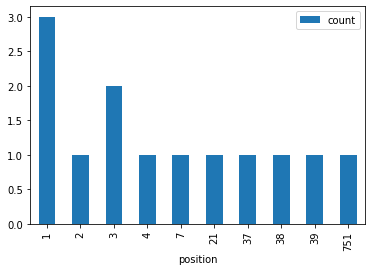

In [123]:
count_dict = {}

for (key,value) in adj_ordered_synonyms_dict.items():
    for temp_num in range(2):
        no_predict = 0
        print("==========================================================")
        text = templates[0].replace('*',key)
        print(text)

        # module
        if mask_token is not None:
            text = text.replace(' _ ', ' %s ' % mask_token)
        tokens = tokenizer.convert_ids_to_tokens(tokenizer.encode(text, add_special_tokens=True))
        tokens = ['*' if token in ['*', 'Ġ*'] else token for token in tokens]
        marker = '*'
        if marker in tokens:
            assert tokens.count(marker) == 2, str(tokens)
            p, h = [i for i, token in enumerate(tokens) if token == marker]
            tokens = [token for token in tokens if token != marker]
            h -= 1
            print(tokens[p], tokens[h])
        token_ids = tokenizer.convert_tokens_to_ids(tokens)
        pred_idx = [i for i, token in enumerate(tokens) if token == mask_token] if mask_token is not None else [-1]
        tokens = ['@' + token if not token.startswith('Ġ') and token not in ['<s>', '</s>', '<mask>'] else token.replace('Ġ', '') 
                  for token in tokens] 
        #print(tokens)

        input_ids = torch.tensor([token_ids])
        with torch.no_grad():
            logits, attns = model(input_ids, output_attentions=True)
            probs = F.softmax(logits, dim=-1)

        for i in pred_idx:
            top_probs, top_indexes = probs[0][i].topk(10)
            top_tokens = tokenizer.convert_ids_to_tokens(top_indexes) 


            # remove G
            ans = []
            for word in top_tokens:
                ans.append(word[1:])
            print(ans)
            print(top_probs)


            # 找到每个同义词位于预测的第几个位置，先找到概率最大的，再去找最大的是预测的第几个
            # 找到每个同义词对应的概率
            word_probe = {}
            for word in value:
                word_id = tokenizer._convert_token_to_id('Ġ'+ word)
                if (word_id != 3):
                    word_probe[word] = probs[0][i][word_id]
                else:
                    print(word + 'is not in list')

            print(word_probe)
            
            # 没有反义词在预测的结果里
            # 保存计算结果的json文件中写为 -1
            if (len(word_probe)==0):
                no_predict = 1
                break
                
            

            # 找到同义词中概率最大的词和值
            max_word = max(word_probe, key=word_probe.get)
            max_probe = word_probe[max_word]

            print('max_probe is: ',end='')
            print(max_probe)

            # 判断概率最大的同义词是预测的第几个
            # 不要陷入死循环
            # k的值不要超过 tensor 的长度
            k = 10
            probe_get = 0
            while(probe_get == 0):
                top_probs, top_indexes = probs[0][i].topk(k)
                #print(top_probs)
                if max_probe in top_probs:
                    print('the position of max probe is: ',end='')
                    print((top_probs == max_probe).nonzero().item())
                    print('-----------------------------------------------------')

                    probe_get = 1
                else:
                    k=k*2
                    print(k)
                    if (k >= list(probs[0][i].size())[0]):
                        top_probs, top_indexes = probs[0][i].topk(probs[0][i].size())
                        print(top_probs)
                        print('the position of max probe is: ',end='')
                        print((top_probs == max_probe).nonzero().item())
                        print('-----------------------------------------------------')
                        probe_get = 1


            print('*****************************************************')


            
        # 没有预测结果
        if(no_predict == 1):
            # 写入结果文件
            if (temp_num == 0):
                result_dict[key] = [result_dict[key],-1]
            else:
                result_dict[key].append(-1)
            break
            
            
        #break
        position = (top_probs == max_probe).nonzero().item()
        if position not in count_dict:
            count_dict[position] = 1
        else:
            count_dict[position]+=1
        


# 画图

count_dict_keys = count_dict.keys()
count_dict_values = count_dict.values()

data = {
    'count':Series(count_dict_values),
    'position':Series(count_dict_keys)
}

df = DataFrame(data)
df.sort_values("position",inplace=True)
print(df)
# plt.bar(count_dict_keys,count_dict_values)
df.plot(x='position',y='count',kind='bar')